# **Imports**

In [39]:
# Correct working directory. But only once. 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential  # Model type to be used
from keras import layers

from evaluation.evaluation_metrics import EvaluationMetrics
from data.dataset import Dataset

ROOT_DIR = pathlib.Path().resolve()
MODEL_ARCH_DIR = str(ROOT_DIR / pathlib.Path("data/dataset/images/model-arch")) + "/"
dataset = Dataset()

tf.compat.v1.enable_eager_execution()

# **Dataset**

Read the `notebooks/model_selection.ipynb` notebbok for more info about the dataset preparation.

In [50]:
X, y = dataset.get_prepared_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train_prob = np.array([y_train[i] for i in range(len(y_train))])

# **CNN with TensorFlow**

The TensorFlow library provides a model called the **Sequential** model which is appropriate for a **plain stack of layers** where 1 layer contains exactly 1 input and 1 output. The Sequential model's main layers are:

* Convolution layers ([1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), [2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), or [3D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv3D)),
* Max-pooling layers ([1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool1D), [2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D), or [3D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool3D)), and
* [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers.

Here are some links that might come handy for the homework:
- [Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model?hl=en)
- [Model Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
- [Loses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [Activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [43]:
# As input, a CNN takes tensors of shape (image_height, image_width, color_channels)
# In our case, we have: 120x120x3
input_shape = (120, 120, 3)
model_name = "My Cool Sequential Model"

# Sequential Model
model = Sequential(name=model_name)
model.add(layer=layers.Input(shape=input_shape))

# TODO: Create your custom sequential model!
model.add(layer=layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(layer=layers.MaxPooling2D(pool_size=(2, 2), padding="same"))  # Padding options: "valid" or "same"
model.add(layer=layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layer=layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layer=layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layer=layers.Flatten())
model.add(layer=layers.Dense(units=64, activation="relu"))
model.add(layer=layers.Dense(units=18)) # How many outputs classes do we have? 18 for 18 element types

# See all your added layers
model.layers

The Sequential model is **not appropriate** for:

* models with multiple inputs or multiple outputs,
* layers with multiple inputs or multiple outputs,
* layer sharing,
* Non-linear topology (e.g. a residual connection, a multi-branch model)

In [44]:
model.summary()

Model: "My Cool Sequential Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 46656)

## **(Bonus) Model Architecture**

TensorFlow provides a cool function to visualize your model. The only requirements are to install the following (if you haven't):

* PyDot via `pip3 install pydot pydotplus`
* Graphviz:
  * For MacOs users: `brew install graphviz`
  * For Linux:
    * Ubuntu: `sudo apt install graphviz`
    * Debian: `sudo apt install graphviz`
    * Fedora: `sudo yum install graphviz`
  * For other Windows see [here](https://graphviz.gitlab.io/download/)

Once the above requirements are installed, reconnect to your VSCode. Congrats, you can now inspect your model architecture!

### HINT

* `image_name` variable can be adjusted as you wish (same name will be overwritten).
* Once you execute the below cell, find your model architecture image in `data/dataset/images/model-arch/*`

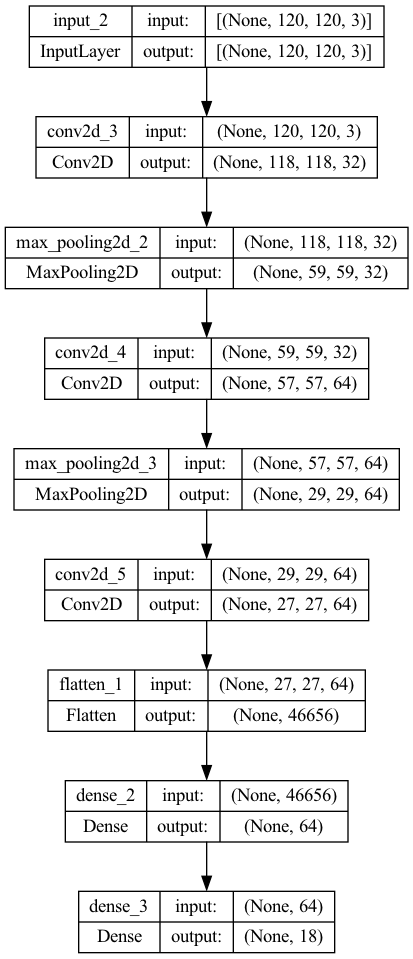

In [24]:
# Inspect your model architecture
image_name = "my_model.png"
tf.keras.utils.plot_model(model=model, to_file=MODEL_ARCH_DIR+image_name, show_shapes=True)

## **Model Training**

In [36]:
# Hyperparameters
hp = {
    "loss": "binary_crossentropy",
    "optimizer": "adam",
    "monitored_func": "val_loss",
    "epochs": 100,
}

Epoch 1/100
21/21 [==============================] - 5s 219ms/step - loss: 0.4246 - val_loss: 0.4855
Epoch 2/100
21/21 [==============================] - 5s 216ms/step - loss: 0.3734 - val_loss: 0.5304
Epoch 3/100
21/21 [==============================] - 4s 212ms/step - loss: 0.3402 - val_loss: 0.5904
Epoch 4/100
21/21 [==============================] - 5s 220ms/step - loss: 0.3138 - val_loss: 0.6642
Epoch 5/100
21/21 [==============================] - 5s 221ms/step - loss: 0.2827 - val_loss: 0.7523
Epoch 6/100
21/21 [==============================] - 5s 239ms/step - loss: 0.2580 - val_loss: 0.8303


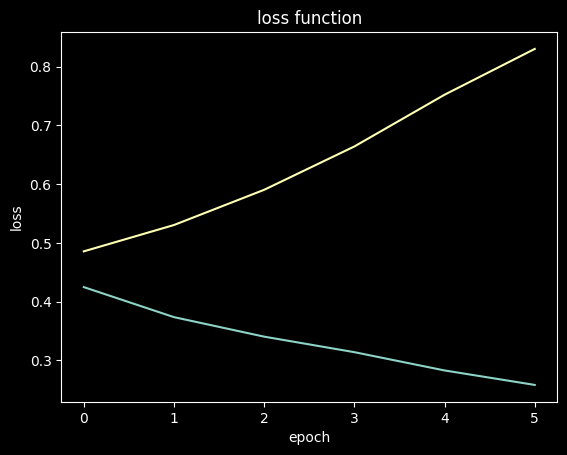

Stopped training after 6 epochs!


In [51]:
# Compilation
model.compile(loss=hp["loss"], optimizer=hp["optimizer"], run_eagerly=True)

# Training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor=hp["monitored_func"], patience=5, restore_best_weights=True)
history = model.fit(x=X_train, y=y_train_prob, epochs=hp["epochs"], validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history["loss"], label='training loss')
plt.plot(history.history["val_loss"],label='validation loss')
plt.title("loss function")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

# Plot training results
print(f"Stopped training after {len(history.epoch)} epochs!")

## **Prediction**

In [67]:
threshold = 0.55
y_pred = model.predict(x=X_test) > threshold
y_pred

6/6 [==============================] - 0s 50ms/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## **Evaluation**

In [68]:
cnn_eval_metrics = EvaluationMetrics(y_true=y_test, y_pred=y_pred)
cnn_eval_metrics.print_evaluation_report(test_description="Convolutional Neural Network - Test Set")


Convolutional Neural Network - Test Set
- subset accuracy: 1 %
- hamming score 0.02
- f1-scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.0, 0.17, 0.0, 0.09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07]
- class accuracies:  [93, 94, 92, 97, 97, 92, 90, 88, 97, 87, 93, 94, 90, 92, 88, 93, 93, 83]
